# Elements Of Data Processing (2021S2) - Week 6


## Web scraping ##
The BeautifulSoup library can be used to scrape data from a web page for processing and analysis.  You can find out more about BeautifulSoup at https://www.crummy.com/software/BeautifulSoup/

### This example extracts tennis scores from the 2019 ATP Tour

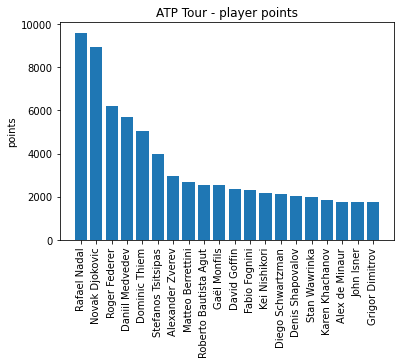

In [1]:
#This example extracts tennis scores from the 2019 ATP Tour

import requests
from bs4 import BeautifulSoup
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
%matplotlib inline 
#Specify the page to download
u = 'https://en.wikipedia.org/wiki/2019_ATP_Tour'
page = requests.get(u)
soup = BeautifulSoup(page.text, 'html.parser')

#Locate the section we're interested in.  Here we are after the second table after the 'ATP_ranking id'
section = soup.find(id='ATP_ranking')
results = section.findNext('table').findNext('table')

#Iterate through all rows in the resultant table
rows = results.find_all('tr')

i = 0
records = []

#for row in rows[1:2]:
#    cells = row.find_all('th')
#    print("{0}, {1}, {2} ,{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
#    # column headers are #, Player, Points, Tours
    
for row in rows[2:]:
    cells = row.find_all('td')
    record = []
    #print("{0}::{1}::{2}::{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
    # column value: 1::Rafael Nadal (ESP)::9,585::12
    
    #Removes junk characters from string and stores the result
    ranking = int(unicodedata.normalize("NFKD", cells[0].text.strip()))
    record.append(int(ranking))
    
    player = unicodedata.normalize("NFKD", cells[1].text.strip())
    #Removes the country from the player name, removing surrounding whitespaces.
    player_name = re.sub('\(.*\)', '', player).strip()
    #print(player_name)
    record.append(player_name)

    #Remove the thousands separator from the points value and store as an integer
    points = unicodedata.normalize("NFKD", cells[2].text.strip())
    record.append(int(re.sub(',', '', points)))
    
    # number of tours: integer type
    tours = unicodedata.normalize("NFKD", cells[3].text.strip())
    record.append(int(tours))
    
    #Store the country code separately
    country_code = re.search('\((.*)\)', player).group(1)
    record.append(country_code)
    #print(record)
    #[1, 'Rafael Nadal', 9585, 12, 'ESP']
    records.append(record)
    i = i+1

column_names = ["ranking", "player", "points", "tours", "country"]
tennis_data = pd.DataFrame(records, columns = column_names)

plt.xticks(rotation='vertical')
plt.bar(tennis_data['player'], tennis_data['points'])
plt.ylabel('points')
plt.title("ATP Tour - player points")
plt.show()

### Side note on *unicodedata.normalize()*

Web pages commonlu uses uncode encoding.

Most ASCII characters are printable characters of the english alphabet such as abc, ABC, 123, ?&!, etc., represented as a number between 32 and 127.
    
Unicode represents most written languages and still has room for even more; this
includes typical left-to-right scripts like English and even right-to-left scripts like Arabic. Chinese, Japanese, and the many other variants are also represented within Unicode
ASCII has its equivalent within Unicode.



In Unicode, several characters can be expressed in various way. 
For example, the character U+00C7 (LATIN CAPITAL LETTER C WITH CEDILLA) 
can also be expressed as the sequence U+0043 (LATIN CAPITAL LETTER C) U+0327 (COMBINING CEDILLA).

The Unicode standard defines various normalization forms of a Unicode string, 
based on the definition of canonical equivalence and compatibility equivalence. 

The function ***unicodedata.normalize("NFKD", unistr)*** 
will apply the compatibility decomposition, i.e. replace all compatibility characters with their equivalents.

#### Example:

In [2]:
unistr = u'\u2460'
print("{0} is the equivalent character of {1}".format(unicodedata.normalize('NFKD', unistr), unistr))


1 is the equivalent character of ①


### <span style="color:blue"> Exercise 1 </span>

Produce a graph similar to the example above for the **2019 ATP Doubles Scores**.

*First locate the section we're interested in.*
    

Text(0.5, 1.0, 'ATP Tour - Doubles points')

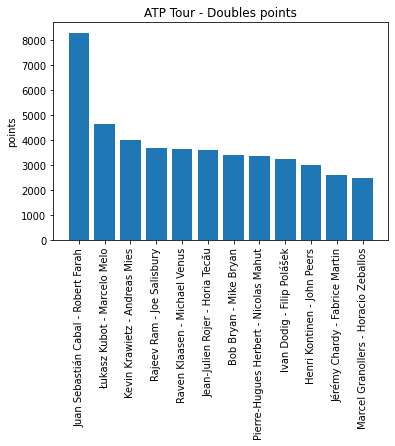

In [3]:
# Solution of exercise 1

import requests
from bs4 import BeautifulSoup
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

#Specify the page to download
u = 'https://en.wikipedia.org/wiki/2019_ATP_Tour'
page = requests.get(u)
soup = BeautifulSoup(page.text, 'html.parser')

#***Locate the section we're interested in.  Here we are after the second table after the 'Double' id
section = soup.find(id='Doubles')
results = section.findNext('table').findNext('table')

#Iterate through all rows in the resultant table
rows = results.find_all('tr')

i = 0
records = []

#for row in rows[1:2]:
#    cells = row.find_all('th')
#    #print("{0}, {1}, {2} ,{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
#    # column headers are #, Team, Points ,Tours
    
for row in rows[2:]:
    cells = row.find_all('td')
    record = []
    #print("{0}::{1}::{2}::{3}".format(cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))
    # column value: 1::Juan Sebastián Cabal (COL) Robert Farah (COL)::8,300::21
    
    #Removes junk characters from string and stores the result
    ranking = int(unicodedata.normalize("NFKD", cells[0].text.strip()))
    record.append(int(ranking))
    
    team = unicodedata.normalize("NFKD", cells[1].text.strip())
    #Removes the country from the player names, removing surrounding whitespaces.
    #print(team)
    # *** note this will not work because matching is greedy) : re.sub('\(.*\)', '', player).strip()
    player_names = re.sub('\([^)]+\)$', '', team).strip()
    player_names = re.sub('\([^)]+\)', '-', player_names).strip()
    #print(player_names)
    record.append(player_names)

    #Remove the thousands separator from the points value and store as an integer
    points = unicodedata.normalize("NFKD", cells[2].text.strip())
    record.append(int(re.sub(',', '', points)))
    
    # number of tours: integer type
    tours = unicodedata.normalize("NFKD", cells[3].text.strip())
    record.append(int(tours))
    
    #***Store the country_code pair separately
    countries = re.findall('\(([^)]+)\)', team)
    record.append('-'.join(countries))
    #print(record)
    # [1, 'Juan Sebastián Cabal - Robert Farah', 8300, 21, 'COL-COL']
    records.append(record)
    i = i+1

column_names = ["ranking", "team", "points", "tours", "countries"]
tennis_data = pd.DataFrame(records, columns = column_names)

plt.xticks(rotation='vertical')
plt.bar(tennis_data['team'], tennis_data['points'])
plt.ylabel('points')
plt.title("ATP Tour - Doubles points")

## Web crawling ##

This example implements a simplified Web crawler that traverses the site 
**[http://books.toscrape.com/](http://books.toscrape.com/)**


In [4]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

page_limit = 20

#Specify the initial page to crawl
base_url = 'http://books.toscrape.com/'
seed_item = 'index.html'

seed_url = base_url + seed_item
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

visited = {}; 
visited[seed_url] = True
pages_visited = 1
print(seed_url)

#Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]


# Resolve to absolute urls
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))

    
#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break
        
    # consume the list of urls
    link = to_visit.pop(0)
    print(link)

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    to_visit
    new_links = soup.findAll('a')
    for new_link in new_links :
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1

print('\nvisited {0:5d} pages; {1:5d} pages in to_visit'.format(len(visited), len(to_visit)))
#print('{0:1d}'.format(pages_visited))


http://books.toscrape.com/index.html
http://books.toscrape.com/catalogue/category/books_1/index.html
http://books.toscrape.com/catalogue/category/books/travel_2/index.html
http://books.toscrape.com/catalogue/category/books/mystery_3/index.html
http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html
http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html
http://books.toscrape.com/catalogue/category/books/classics_6/index.html
http://books.toscrape.com/catalogue/category/books/philosophy_7/index.html
http://books.toscrape.com/catalogue/category/books/romance_8/index.html
http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html
http://books.toscrape.com/catalogue/category/books/fiction_10/index.html
http://books.toscrape.com/catalogue/category/books/childrens_11/index.html
http://books.toscrape.com/catalogue/category/books/religion_12/index.html
http://books.toscrape.com/catalogue/category/books/nonfiction_13/index.ht

### <span style="color:blue"> Exercise 2 </span>

The code above can easily be end up stuck in a crawler trap.  
Explain three ways this could occur and suggest possible solutions

In [5]:
#Exercise 2: The code above can easily be end up stuck in a crawler trap.  
#Explain three ways this could occur and suggest possible solutions

#Some possibilities include:
#- Infinite links (e.g. calendar dates)
#- Autogenerated pages
#- Auto-generated URLs linking to the same content
#- Bookmarks or URL parameters making the same page appear to have a different URL
possibilities = [
'- Infinite links (e.g. calendar dates)',
'- Autogenerated pages',
'- Auto-generated URLs linking to the same content',
'- Bookmarks or URL parameters making the same page appear to have a different URL'
]

for p in possibilities:
    print(p)

- Infinite links (e.g. calendar dates)
- Autogenerated pages
- Auto-generated URLs linking to the same content
- Bookmarks or URL parameters making the same page appear to have a different URL


### <span style="color:blue"> Exercise 3 </span>

Modify the code above to print the titles of as many books as can be found within the page_limit


In [6]:
# Solution to exercise 3
# Modify the code above to print the titles of as many books as can be found within the page_limit

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt

page_limit = 20

#Specify the initial page to crawl
base_url = 'http://books.toscrape.com/'
seed_item = 'index.html'

seed_url = base_url + seed_item
#print(seed_url)
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

#visited = {}; 
#visited[seed_url] = True
pages_visited = 1


#Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
#to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]

titles = set()
# 1. Resolve to absolute urls 
# 2. Add titles in seed_url page
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))
    if link.has_attr('title'):
        titles.add(link['title'])

#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
    
    # consume the list of urls
    link = to_visit.pop(0)
    #print(link)
    # Impose a limit to avoid breaking the site 
    if pages_visited == page_limit :
        break

    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    new_links = soup.findAll('a')
    for new_link in new_links :
        # add all titles of the links of the current link
        if new_link.has_attr('title'):
            titles.add(new_link['title'])
            
        # add new absolute url to to_visit list
        new_item = new_link['href']
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1
print('\nvisited {0:5d} pages; {1:5d} pages in to_visit'.format(len(visited), len(to_visit)))

print("{0:3d} unique titles".format(len(titles)))
for b in titles:
    print("\t{0}".format(b))


visited    20 pages;   371 pages in to_visit
307 unique titles
	Shakespeare's Sonnets
	Tsubasa: WoRLD CHRoNiCLE 2 (Tsubasa WoRLD CHRoNiCLE #2)
	Foundation (Foundation (Publication Order) #1)
	Girl With a Pearl Earring
	A Gentleman's Position (Society of Gentlemen #3)
	My Name Is Lucy Barton
	City of Glass (The Mortal Instruments #3)
	That Darkness (Gardiner and Renner #1)
	World Without End (The Pillars of the Earth #2)
	Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
	On a Midnight Clear
	The Requiem Red
	The Last Girl (The Dominion Trilogy #1)
	Sit, Stay, Love
	The Red Tent
	The Bane Chronicles (The Bane Chronicles #1-11)
	It's Only the Himalayas
	The Past Never Ends
	Tracing Numbers on a Train
	The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
	Mrs. Houdini
	Dark Lover (Black Dagger Brotherhood #1)
	I Am Pilgrim (Pilgrim #1)
	Saga, Volume 6 (Saga (Collected Editions) #6)
	Full Moon over Noahâs Ark: An Odysse